#**MOSFET Transistors - Current Value Prediction**

## Importing the essential libraries

In [ ]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading the data from my mounted drive

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/simulated_data_nmos.csv',sep=',')

In [ ]:
df

,vds,L(um),W(um),drain_length(um),temperature,vgs,vsb,vth,v_pinch_off,lambda(um),...,gmb(uS),ro(Kohm),cgg(aF),cgs(aF),cgd(aF),cdd(aF),cdb(aF),cgb(aF),csb(aF),corner
0,-0.45,8.00,0.84,0.3,27.0,0.0,0.0,0.402306,-0.45,-0.011819,...,0.197561,3.181189e+06,34032.24450,-28204.18220,-69.122702,88.099279,-4468.207890,-5758.93958,-6638.150460,tt
1,-0.40,8.00,0.84,0.3,27.0,0.0,0.0,0.420865,-0.45,-0.011819,...,0.060563,6.552405e+06,31291.95360,-24561.09330,-64.892149,80.854021,-3789.708030,-6665.96815,-5628.278470,tt
2,-0.35,8.00,0.84,0.3,27.0,0.0,0.0,0.438375,-0.45,-0.011819,...,0.016120,1.321234e+07,28034.58390,-20243.40750,-60.510512,73.904890,-3083.997720,-7730.66594,-4577.237700,tt
3,-0.30,8.00,0.84,0.3,27.0,0.0,0.0,0.454991,-0.45,-0.011819,...,0.003967,3.684764e+07,24469.87620,-15523.22350,-56.971381,68.328120,-2370.676590,-8889.68129,-3514.234390,tt
4,-0.25,8.00,0.84,0.3,27.0,0.0,0.0,0.470835,-0.45,-0.011819,...,0.000886,1.229205e+08,20989.54820,-10919.34920,-55.582426,65.518741,-1701.531230,-10014.61660,-2516.573480,tt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871483,2.30,0.15,7.00,0.3,27.0,1.8,1.5,0.746876,-0.45,198.721571,...,-99.799597,1.338060e+00,5418.05266,-4258.70269,205.520818,-85.959983,16.893732,-1364.87078,25.325071,ff
871484,2.35,0.15,7.00,0.3,27.0,1.8,1.5,0.744368,-0.45,198.721571,...,-107.805564,1.339326e+00,5418.37699,-4251.71503,205.529272,-86.003139,19.741683,-1372.19124,29.596444,ff
871485,2.40,0.15,7.00,0.3,27.0,1.8,1.5,0.741860,-0.45,198.721571,...,-115.832387,1.340482e+00,5418.70251,-4244.72425,205.533801,-86.041687,22.589378,-1379.51206,33.867534,ff
871486,2.45,0.15,7.00,0.3,27.0,1.8,1.5,0.739353,-0.45,198.721571,...,-123.879075,1.341536e+00,5419.02894,-4237.73022,205.534568,-86.076065,25.436771,-1386.83329,38.138255,ff


I will now have an overview of the data.

In [ ]:
df.shape                                                                     # The data has 58372 rows and 23 columns

(871488, 23)

In [ ]:
df.columns                                                                   # All the columns in the data

Index(['vds', 'L(um)', 'W(um)', 'drain_length(um)', 'temperature', 'vgs',
       'vsb', 'vth', 'v_pinch_off', 'lambda(um)', 'id(uA)', 'ig(aA)', 'gm(uS)',
       'gmb(uS)', 'ro(Kohm)', 'cgg(aF)', 'cgs(aF)', 'cgd(aF)', 'cdd(aF)',
       'cdb(aF)', 'cgb(aF)', 'csb(aF)', 'corner'],
      dtype='object')

### Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871488 entries, 0 to 871487
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   vds               871488 non-null  float64
 1   L(um)             871488 non-null  float64
 2   W(um)             871488 non-null  float64
 3   drain_length(um)  871488 non-null  float64
 4   temperature       871488 non-null  float64
 5   vgs               871488 non-null  float64
 6   vsb               871488 non-null  float64
 7   vth               871488 non-null  float64
 8   v_pinch_off       871488 non-null  float64
 9   lambda(um)        871488 non-null  float64
 10  id(uA)            871488 non-null  float64
 11  ig(aA)            871488 non-null  float64
 12  gm(uS)            871488 non-null  float64
 13  gmb(uS)           871488 non-null  float64
 14  ro(Kohm)          871488 non-null  float64
 15  cgg(aF)           871488 non-null  float64
 16  cgs(aF)           87

There is no null values in the data. Also, only 1 categorical value in the data in the 'corner' column.

#### Dropping Duplicates

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(871488, 23)

Still the same shape so there was no duplicates. And since we knew there was no nulls in the data, then it's cleaned.

#### Dropping unnecessary columns
Since we won't be using all of the dataset for our model, I will focus my analysis on our model input parameters.

In [ ]:
df.columns

Index(['vds', 'L(um)', 'W(um)', 'drain_length(um)', 'temperature', 'vgs',
       'vsb', 'vth', 'v_pinch_off', 'lambda(um)', 'id(uA)', 'ig(aA)', 'gm(uS)',
       'gmb(uS)', 'ro(Kohm)', 'cgg(aF)', 'cgs(aF)', 'cgd(aF)', 'cdd(aF)',
       'cdb(aF)', 'cgb(aF)', 'csb(aF)', 'corner'],
      dtype='object')

In [ ]:
col_names = ['vds', 'L(um)', 'W(um)', 'drain_length(um)', 'temperature', 'vgs', 'vsb', 'corner','id(uA)']
df = df[col_names]

In [ ]:
df

,vds,L(um),W(um),drain_length(um),temperature,vgs,vsb,corner,id(uA)
0,-0.45,8.00,0.84,0.3,27.0,0.0,0.0,tt,0.034866
1,-0.40,8.00,0.84,0.3,27.0,0.0,0.0,tt,0.009451
2,-0.35,8.00,0.84,0.3,27.0,0.0,0.0,tt,0.002331
3,-0.30,8.00,0.84,0.3,27.0,0.0,0.0,tt,0.000532
4,-0.25,8.00,0.84,0.3,27.0,0.0,0.0,tt,0.000111
...,...,...,...,...,...,...,...,...,...
871483,2.30,0.15,7.00,0.3,27.0,1.8,1.5,ff,4289.588350
871484,2.35,0.15,7.00,0.3,27.0,1.8,1.5,ff,4326.932100
871485,2.40,0.15,7.00,0.3,27.0,1.8,1.5,ff,4364.240650
871486,2.45,0.15,7.00,0.3,27.0,1.8,1.5,ff,4401.516730


 ### First-look Univariate / Numerical insights

In [ ]:
df.describe()

,vds,L(um),W(um),drain_length(um),temperature,vgs,vsb,id(uA)
count,871488.000000,871488.000000,871488.000000,8.714880e+05,871488.0,871488.000000,871488.000000,871488.000000
mean,1.000138,0.329525,3.664366,3.000000e-01,27.0,0.895708,0.745869,339.674855
std,0.880264,0.431887,6.682675,4.996006e-16,0.0,0.535547,0.513941,1229.868653
min,-0.500000,0.150000,0.360000,3.000000e-01,27.0,0.000000,0.000000,0.000000
25%,0.250000,0.150000,0.650000,3.000000e-01,27.0,0.450000,0.300000,0.000836
50%,1.000000,0.150000,0.940000,3.000000e-01,27.0,0.900000,0.600000,12.420166
75%,1.750000,0.500000,1.000000,3.000000e-01,27.0,1.350000,1.200000,122.021384
max,2.500000,8.000000,25.000000,3.000000e-01,27.0,1.800000,1.500000,14979.728300


1- Data standardization:

Here I was checking the min, max, 50%, and the mean of the columns. I noticed that most of the variables are not on the same scale/range so we need to standardize the data. Also, some variables have negative values so I'll take this into account while standardizing.

2- Drain leangth & temperature, nearly std = 0:

However, the highlight here is the 'drain_length' & 'temperature' column. Temperature always = 27 degrees in our data. Similarly, drain_length always = 0.3, This means it will unlikely be of any value to our model. I will test if they have any effect to our model, if not I will drop them.

3- Current value 'id(uA)'

I noticed that the output column has a very low variance nearly = 0 in the first quartile (min to 25%) while having a very big variance in the last quartile range (75% to max). This normally indicates huge outliers in the current value after certain threshold while being nearly static before another threshold. This also means that the current value can suddenly overshoot aggressively and hence need careful monitoring.

I will now check the categories of the only 'object' datatype column, 'corner'.

In [ ]:
df['corner'].value_counts()

fs    177067
tt    177006
sf    176884
ff    176823
ss    163708
Name: corner, dtype: int64

Since 'corner' will be an input to the model, it's important to note that we will need to label encode or one-hot encode this categorical column. I don't think its categories are ordinal but I'm not sure.\
It's also noticable that the categories are quietly balanced.

I wanted to check if each column actually only contains continuous values.\
Or do some columns have discrete specific values?

In [ ]:
for col in df.columns:                 # Investigating the values of each column
  print(df[col].value_counts())

-0.45    14288
 1.10    14288
 1.20    14288
 1.25    14288
 1.30    14288
         ...  
 0.80    14288
 0.85    14288
 0.90    14288
 0.95    14288
-0.50    14208
Name: vds, Length: 61, dtype: int64
0.15    473935
0.50    395245
8.00      2308
Name: L(um), dtype: int64
0.84     136808
0.65     136320
7.00     135410
1.00     135410
0.36     135410
0.94     122417
25.00     69713
Name: W(um), dtype: int64
0.3    871488
Name: drain_length(um), dtype: int64
27.0    871488
Name: temperature, dtype: int64
0.05    24400
0.00    24320
0.10    24278
0.15    24217
0.20    23973
0.25    23729
0.30    23668
0.35    23546
0.40    23485
1.45    23424
1.25    23424
1.30    23424
1.35    23424
1.40    23424
1.65    23424
1.50    23424
1.55    23424
1.60    23424
1.15    23424
1.70    23424
1.75    23424
1.20    23424
0.90    23424
1.10    23424
1.05    23424
1.00    23424
0.95    23424
0.85    23424
0.80    23424
0.75    23424
0.70    23424
0.65    23424
0.60    23424
0.55    23424
0.50    23424
0.

Other than the continuous current value / 'id(uA)' output column, I noted that most columns have from 1 to 7 values at most, except for 'vds' & 'vgs' which are continous values.\
I will use this info in choosing the type of plots that best represents the data.

## Data Visualization

### Univariate graphical Analysis

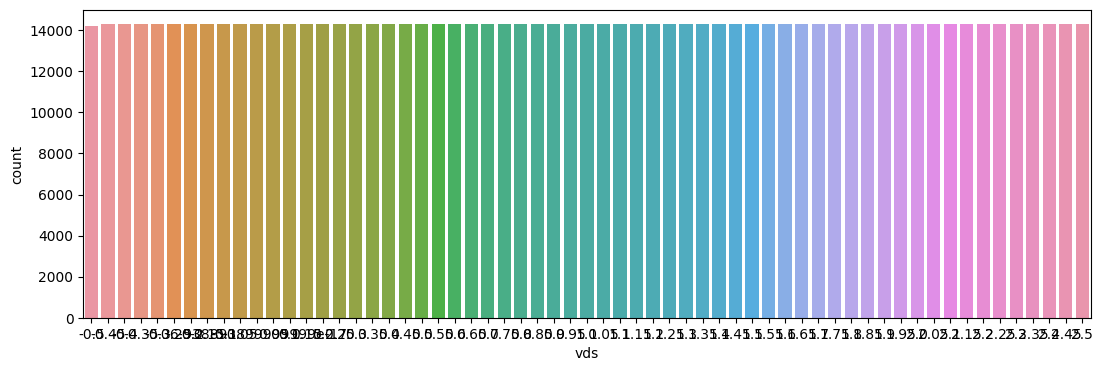

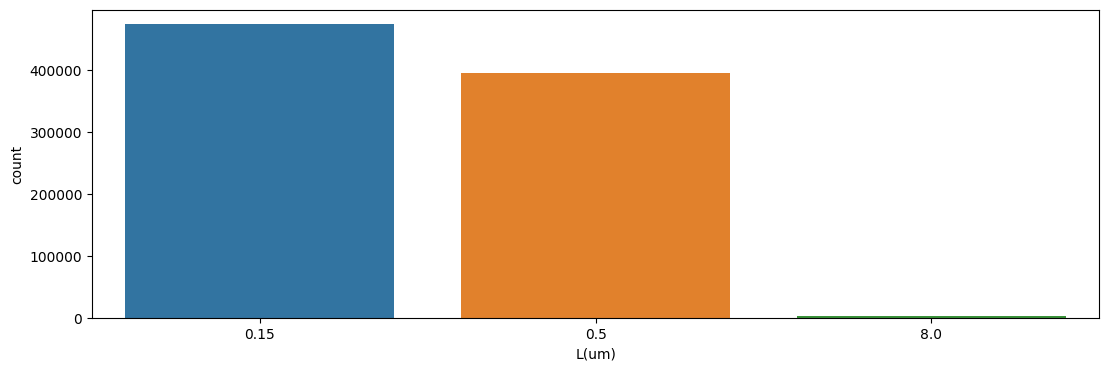

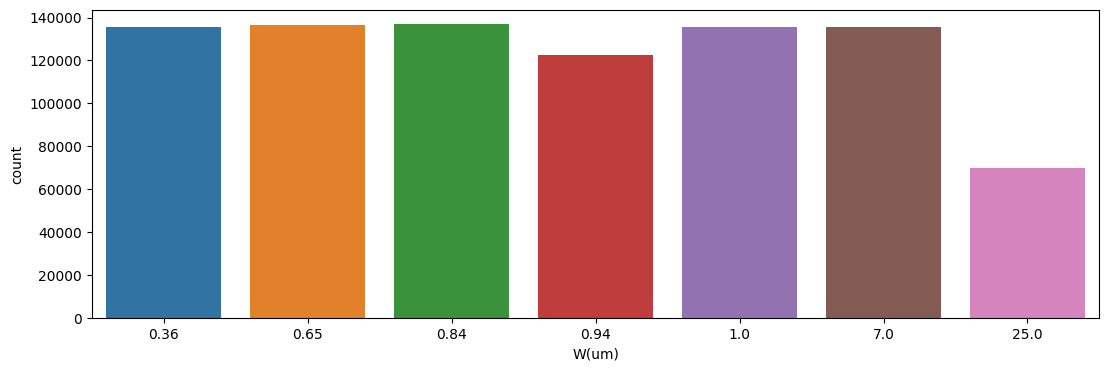

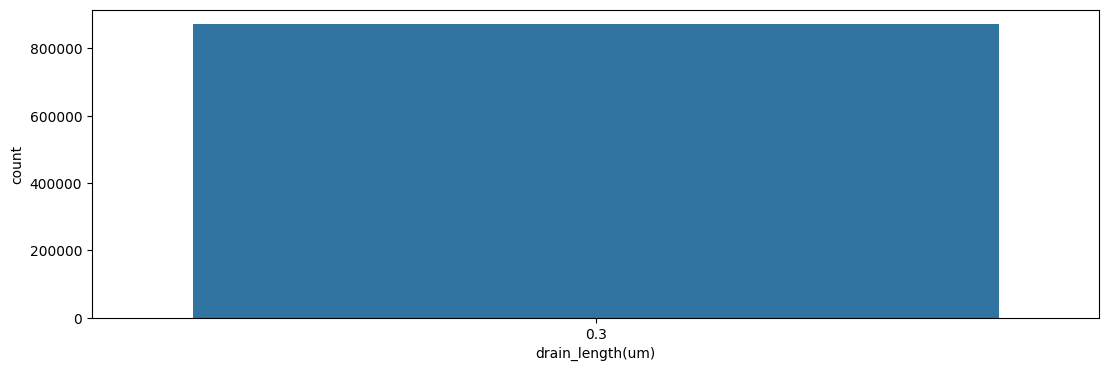

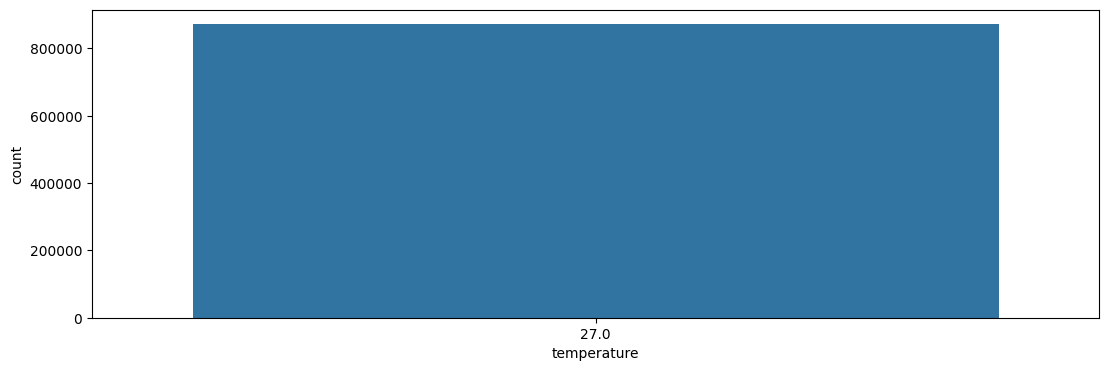

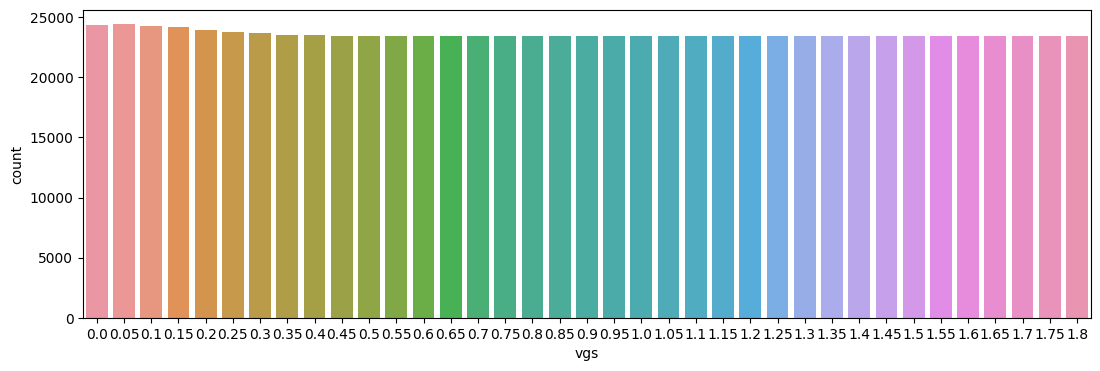

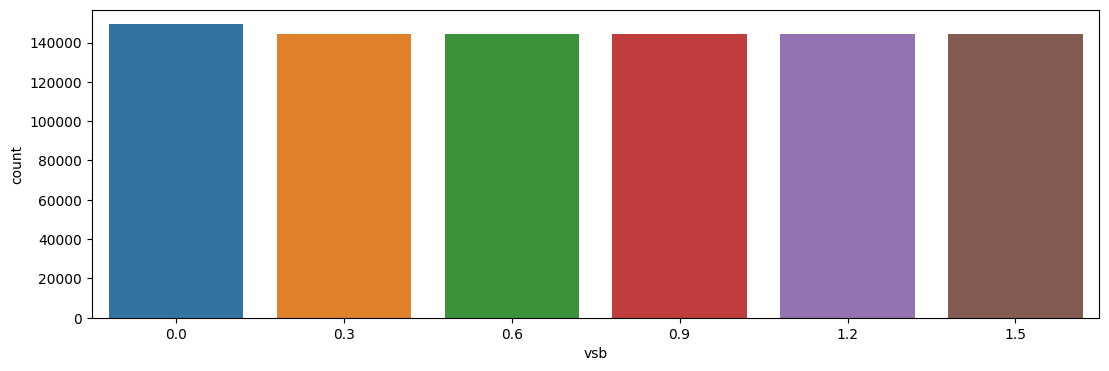

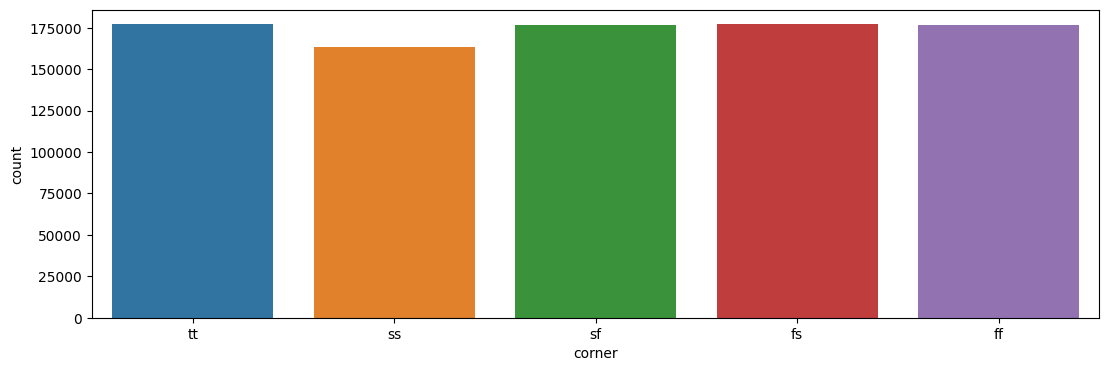

In [ ]:
for col in df.columns[:-1]:                 # Investigating the values count of each column
  plt.figure(figsize = (13,4))
  sns.countplot(x = df[col])

This gives us the info as the value_counts code but graphically. One thing I noted here more was that all columns are nearly balanced except for the 'L(um)' & 'W(um)' columns which have a slight little variance. This is a good indicator that the model will not be biased.

<function matplotlib.pyplot.show(close=None, block=None)>

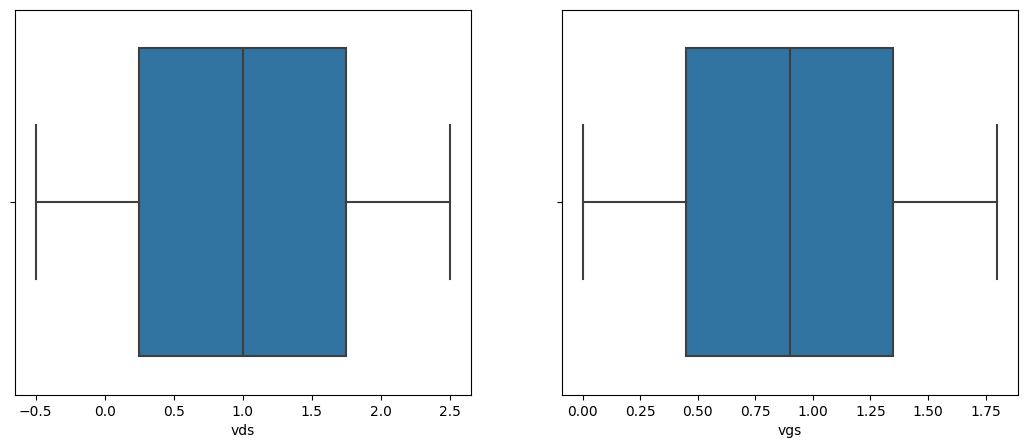

In [ ]:
plt.figure(figsize = (20,5))


plt.subplot(1,3,1)
sns.boxplot(x = df['vds'])

plt.subplot(1,3,2)
sns.boxplot(x = df['vgs'])



plt.show

These 2 boxplots show that the 'vds' & 'vgs' features are nearly uniformaly distributed.

<function matplotlib.pyplot.show(close=None, block=None)>

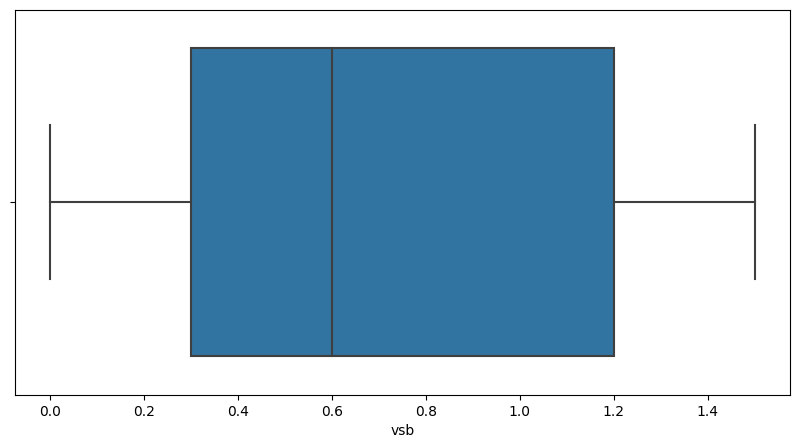

In [ ]:
plt.figure(figsize = (10,5))

sns.boxplot(x = df['vsb'])

plt.show

This shows the slight right skewed distribution of the vsb.

Now, I'll check the 2 columns with the highest variance.

<function matplotlib.pyplot.show(close=None, block=None)>

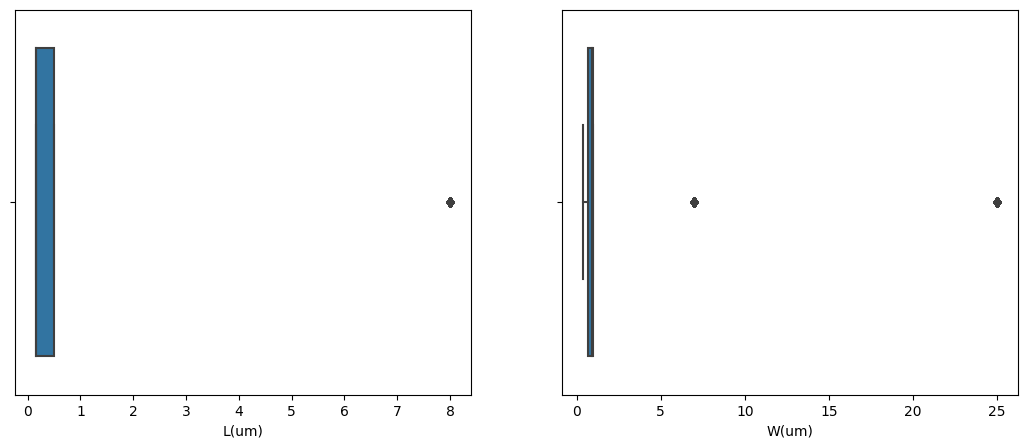

In [ ]:
plt.figure(figsize = (20,5))


plt.subplot(1,3,1)
sns.boxplot(x = df['L(um)'])

plt.subplot(1,3,2)
sns.boxplot(x = df['W(um)'])



plt.show

<ipython-input-20-0cd6a4fa277a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df['L(um)'])
<ipython-input-20-0cd6a4fa277a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df['W(um)'])


<function matplotlib.pyplot.show(close=None, block=None)>

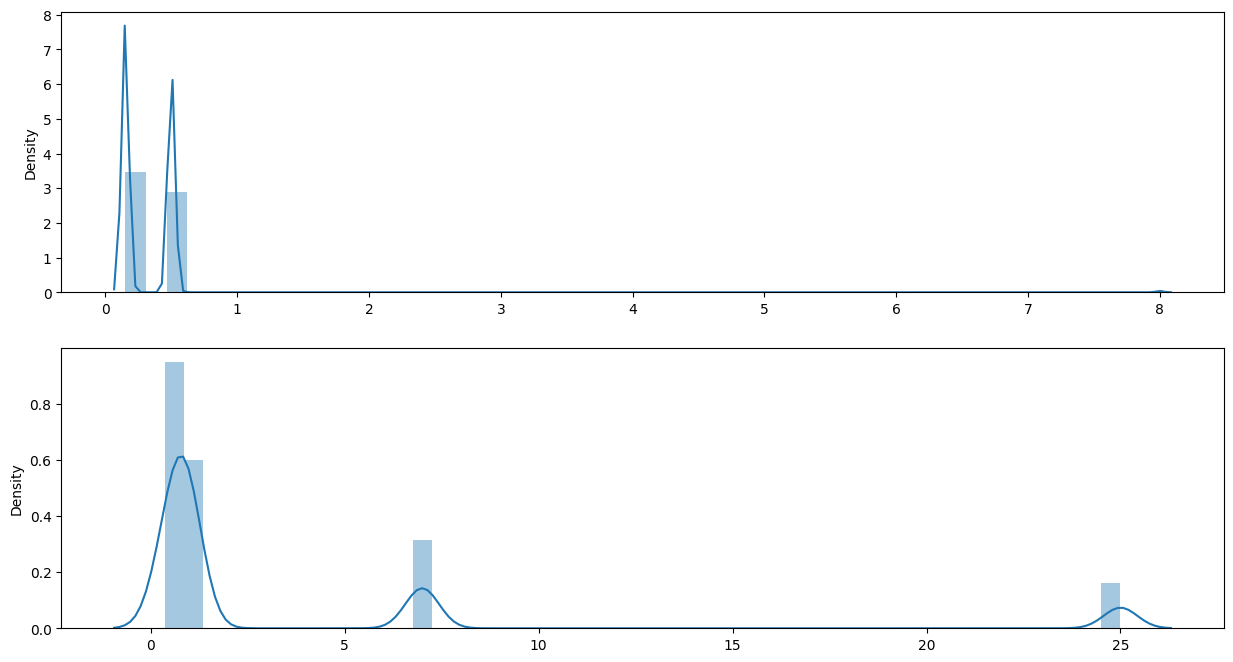

In [ ]:
plt.figure(figsize = (15,8))


plt.subplot(2,1,1)
sns.distplot(x = df['L(um)'])

plt.subplot(2,1,2)
sns.distplot(x = df['W(um)'])



plt.show

Here I wanted to investigate the outliers from the boxplot and the distribution of the 'L(um)' & 'W(um)' from the density plot.

Now let's check the output column 'id(uA)'

<Axes: xlabel='id(uA)'>

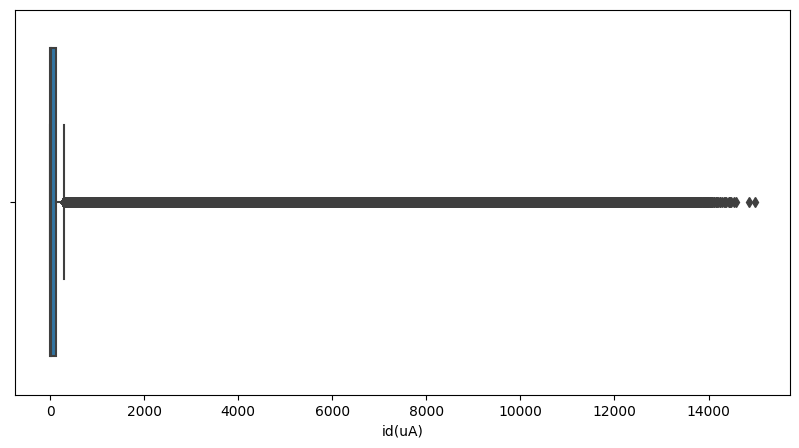

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(x = df['id(uA)'])

<ipython-input-22-1aed48a44b61>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['id(uA)'])


<Axes: xlabel='id(uA)', ylabel='Density'>

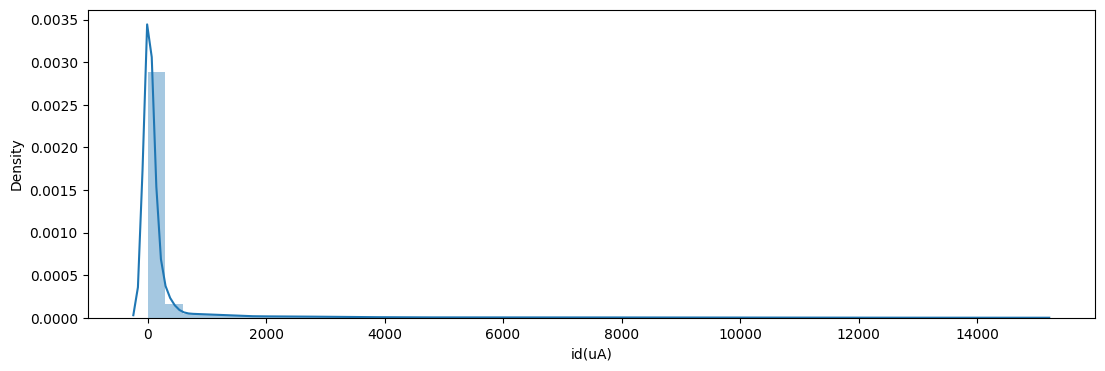

In [ ]:
  plt.figure(figsize = (13,4))
  sns.distplot(df['id(uA)'])

In these 2 graphs I show the same info in a different representation.\
The first boxplot graph describe the outliers in the current value more as you can see disconnected dots in the far extreme right.\
While the second shows more the density & the distribution of values between 0 & 200 uA which is more than 75% of the current values in the data.

### Bivariate Analysis
Correlation map

<ipython-input-23-afc404a8d14d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


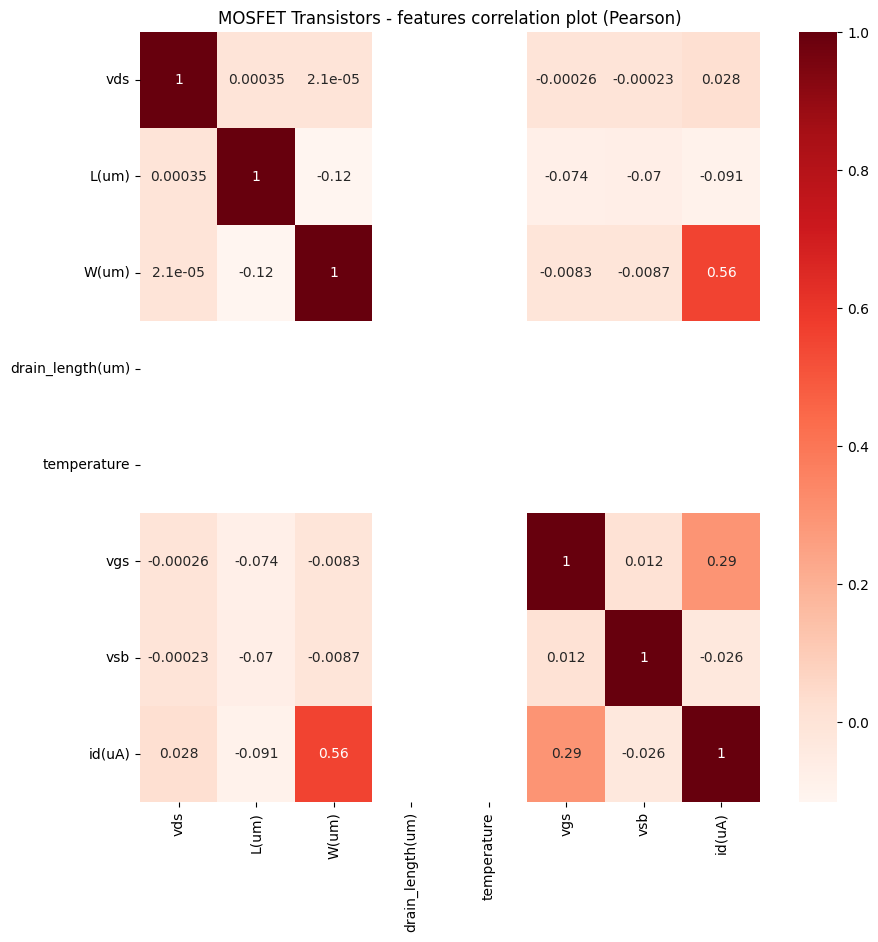

In [ ]:
plt.figure(figsize = (10,10))
plt.title('MOSFET Transistors - features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,annot=True,cmap="Reds")
plt.show()

*   As we expected, temperature and drain length columns do not correlate at all with any other feature.

*   The output column 'id(uA)' has a weak positive correlation with 'vgs' column and a moderate positive correlation with 'W(um)' column.

*   Important Note: Feature's correlation matrix only represents the "linear" correlation or relationship between features. While the deep learning model should capture all the linear and non-linear relationship between the input and the output.

<Axes: xlabel='id(uA)', ylabel='corner'>

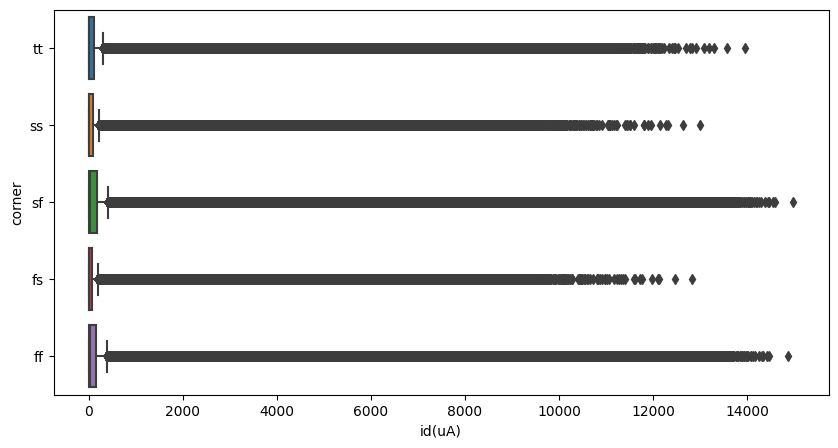

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(x = df['id(uA)'], y = df['corner'])

I tried multiple times to draw these Bivariate & Multivariate graphs to further explore how the current 'id' changes by changing 'W' & 'vgs' and visualiza the positive correlation between them, but the session crashed after 30 min. of running. As the data is big and the free available RAM from Google Colab was not enough.

In [ ]:
# plt.figure(figsize = (10,5))
# sns.boxplot(x = df['id(uA)'], y = df['W(um)'])

In [ ]:
# plt.figure(figsize = (10,5))
# sns.boxplot(x = df['id(uA)'], y = df['vgs'])

In [ ]:
# # Multivariate
# # Current Differentiation - Box Plot by W(um) and vgs
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='id(uA)', y='W(um)', hue='vgs', data=df)
# plt.title('Current value Differentiation by Width and vgs')
# plt.xlabel('id(uA)')
# plt.ylabel('W(um)')
# plt.xticks(rotation=45)
# plt.legend(title='vgs')
# plt.tight_layout()
# plt.show()


### Multivariate Analysis

<Figure size 1000x1000 with 0 Axes>

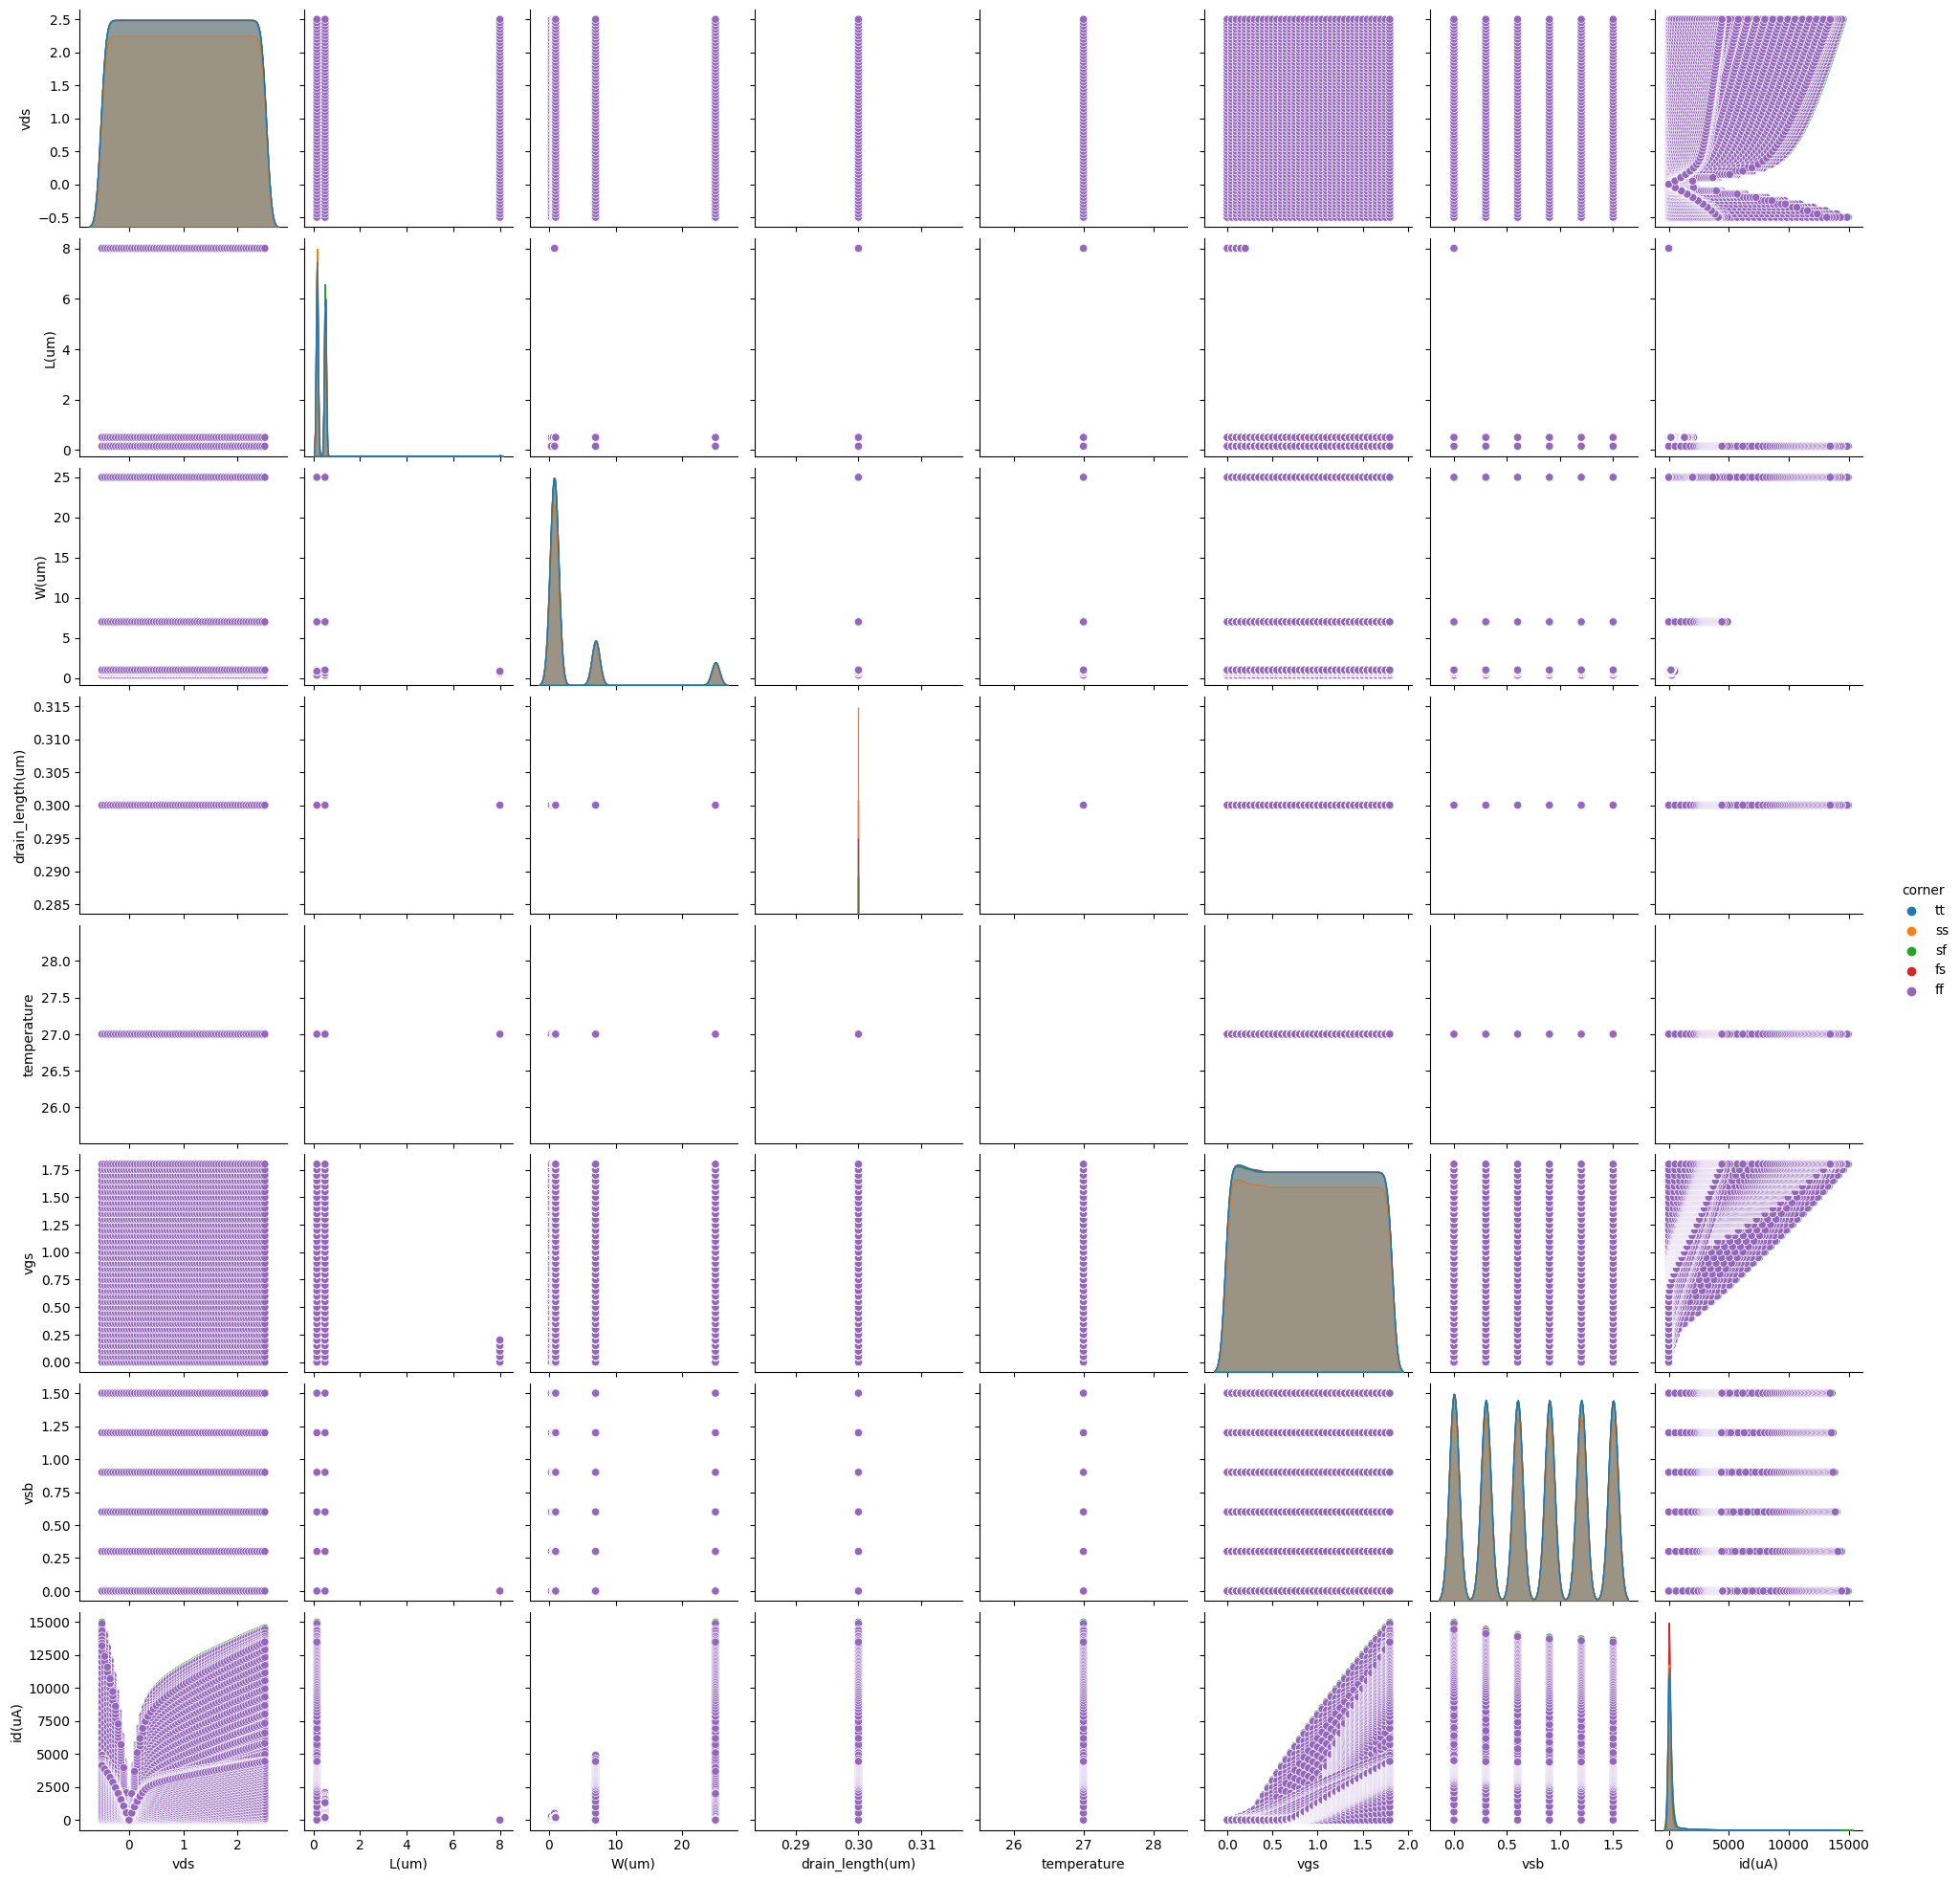

In [ ]:
plt.figure(figsize = (10,10))
sns.pairplot(df, diag_kind = 'kde', hue = 'corner')

Here I wanted to investigate the relation between every 2 features of the data while also visualizing the only categorical column in the data which is the 'corner'.
I mainly noticed 3 things:

*   How 'vgs' & 'W(um)' increase when increases 'id(uA)' and vice versa. showing the positive correlation.
*   Visualizing the 'corner' categories only gave a purple colour for the 'ff' class while the rest of colours being represented in the feature pairing itself in the graph. It's my first time to encounter this, don't know what it means.
*   'vds' vs 'id(uA) relationship where under vds = 0, id decreases as vds approaches 0 while after vds = 0, the current id increases with vds.






My sessior crashed -again- after using all available RAM so now I won't execute the previous cells again and start again from here.

In [ ]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/simulated_data_nmos.csv',sep=',')            # Re-reading the data

In [ ]:
col_names = ['vds', 'L(um)', 'W(um)', 'vgs', 'vsb', 'corner','id(uA)']           # I dropped the columns with std = 0
df = df[col_names]

In [ ]:
df

,vds,L(um),W(um),vgs,vsb,corner,id(uA)
0,-0.45,8.00,0.84,0.0,0.0,tt,0.034866
1,-0.40,8.00,0.84,0.0,0.0,tt,0.009451
2,-0.35,8.00,0.84,0.0,0.0,tt,0.002331
3,-0.30,8.00,0.84,0.0,0.0,tt,0.000532
4,-0.25,8.00,0.84,0.0,0.0,tt,0.000111
...,...,...,...,...,...,...,...
871483,2.30,0.15,7.00,1.8,1.5,ff,4289.588350
871484,2.35,0.15,7.00,1.8,1.5,ff,4326.932100
871485,2.40,0.15,7.00,1.8,1.5,ff,4364.240650
871486,2.45,0.15,7.00,1.8,1.5,ff,4401.516730


In [ ]:
df.describe()

,vds,L(um),W(um),vgs,vsb,id(uA)
count,871488.000000,871488.000000,871488.000000,871488.000000,871488.000000,871488.000000
mean,1.000138,0.329525,3.664366,0.895708,0.745869,339.674855
std,0.880264,0.431887,6.682675,0.535547,0.513941,1229.868653
min,-0.500000,0.150000,0.360000,0.000000,0.000000,0.000000
25%,0.250000,0.150000,0.650000,0.450000,0.300000,0.000836
50%,1.000000,0.150000,0.940000,0.900000,0.600000,12.420166
75%,1.750000,0.500000,1.000000,1.350000,1.200000,122.021384
max,2.500000,8.000000,25.000000,1.800000,1.500000,14979.728300


*As I previously noticed, the features with std = 0 will not only not affect the model but instead, it caused the problem of nulling many data records after scaling.*

*It is likely because the standardization process resulted in dividing by zero or encountered extremely small values. This can happen if the standard deviation of a particular feature is zero or close to zero.*

*So now I will remove those 2 columns which are 'drain_length' & 'temperature'.*

*I still encountered the same issue so I was looking for the smallest std in the data. I will now try removing L(um) as it has 0.43 and hope it works.*

In [ ]:
col_names = ['vds', 'W(um)', 'vgs', 'corner','id(uA)']           # I dropped the columns with std = 0 or near 0
df = df[col_names]

In [ ]:
df

,vds,W(um),vgs,corner,id(uA)
0,-0.45,0.84,0.0,tt,0.034866
1,-0.40,0.84,0.0,tt,0.009451
2,-0.35,0.84,0.0,tt,0.002331
3,-0.30,0.84,0.0,tt,0.000532
4,-0.25,0.84,0.0,tt,0.000111
...,...,...,...,...,...
871483,2.30,7.00,1.8,ff,4289.588350
871484,2.35,7.00,1.8,ff,4326.932100
871485,2.40,7.00,1.8,ff,4364.240650
871486,2.45,7.00,1.8,ff,4401.516730


## Data Preprocessing


### Label Encoding
Since 'corner' is categorical but not ordinal, I will not be using label encoder as it creates an order relation with each category. Instead I'll be using get_dummies as a straightforward implementation od One-Hot-Encoding.

In [ ]:
df_encoded = pd.get_dummies(df, columns=['corner'])

In [ ]:
df_encoded

,vds,L(um),W(um),vgs,vsb,id(uA),corner_ff,corner_fs,corner_sf,corner_ss,corner_tt
0,-0.45,8.00,0.84,0.0,0.0,0.034866,0,0,0,0,1
1,-0.40,8.00,0.84,0.0,0.0,0.009451,0,0,0,0,1
2,-0.35,8.00,0.84,0.0,0.0,0.002331,0,0,0,0,1
3,-0.30,8.00,0.84,0.0,0.0,0.000532,0,0,0,0,1
4,-0.25,8.00,0.84,0.0,0.0,0.000111,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
871483,2.30,0.15,7.00,1.8,1.5,4289.588350,1,0,0,0,0
871484,2.35,0.15,7.00,1.8,1.5,4326.932100,1,0,0,0,0
871485,2.40,0.15,7.00,1.8,1.5,4364.240650,1,0,0,0,0
871486,2.45,0.15,7.00,1.8,1.5,4401.516730,1,0,0,0,0


### Data splitting

In [ ]:
y = pd.DataFrame(df_encoded['id(uA)'])

df_encoded.drop('id(uA)',axis=1,inplace = True)

x = df_encoded[df_encoded.columns]

In [ ]:
x

,vds,L(um),W(um),vgs,vsb,corner_ff,corner_fs,corner_sf,corner_ss,corner_tt
0,-0.45,8.00,0.84,0.0,0.0,0,0,0,0,1
1,-0.40,8.00,0.84,0.0,0.0,0,0,0,0,1
2,-0.35,8.00,0.84,0.0,0.0,0,0,0,0,1
3,-0.30,8.00,0.84,0.0,0.0,0,0,0,0,1
4,-0.25,8.00,0.84,0.0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
871483,2.30,0.15,7.00,1.8,1.5,1,0,0,0,0
871484,2.35,0.15,7.00,1.8,1.5,1,0,0,0,0
871485,2.40,0.15,7.00,1.8,1.5,1,0,0,0,0
871486,2.45,0.15,7.00,1.8,1.5,1,0,0,0,0


In [ ]:
y

,id(uA)
0,0.034866
1,0.009451
2,0.002331
3,0.000532
4,0.000111
...,...
871483,4289.588350
871484,4326.932100
871485,4364.240650
871486,4401.516730


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=42)

In [ ]:
X_train

,vds,L(um),W(um),vgs,vsb,corner_ff,corner_fs,corner_sf,corner_ss,corner_tt
372961,1.650000e+00,0.50,7.00,0.35,0.6,0,0,1,0,0
151336,-5.000000e-02,0.15,0.36,1.50,0.0,0,0,0,0,1
506750,-6.938894e-17,0.15,7.00,0.35,0.3,0,0,1,0,0
527437,4.500000e-01,0.15,0.84,0.65,1.2,0,1,0,0,0
645492,1.950000e+00,0.50,0.94,0.95,0.6,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
259178,2.000000e-01,0.15,7.00,1.80,1.5,0,0,0,1,0
365838,2.300000e+00,0.50,0.36,0.05,1.5,0,0,1,0,0
131932,-5.000000e-01,0.50,0.94,0.60,1.2,0,0,0,0,1
671155,1.200000e+00,0.15,0.94,1.25,0.3,0,1,0,0,0


### Data Standardization

Data standardizing/normalizing is important for inputting the data to the model with every feature has the same range as the other so that in calculations the model doesn't get biased to the biggest numbers.

My approach was to ensure while standardizing that the outliers were handled and not affecting the data. Hence, I decided to try Robust Scaler first as it is less sensitive to outliers. When I got null records, I searched and read Robust scaler can cause this if there were too many outliers in the data. So I tried MinMax scaler but also got nulls.

**NOTE:** After careful examination I came to the conclusion that while the data still have outliers, the data doesn't need and can't handle more normalization to the data as it is already mostly values close to zero. So here is my documented work but this 'Data Standardization' part was skipped.

In [ ]:
X_train.columns[:-5]    # I wanted to only standardize the continuous feature values

Index(['vds', 'L(um)', 'W(um)', 'vgs', 'vsb'], dtype='object')

In [ ]:
# Robust Scaler

from sklearn.preprocessing import RobustScaler

# Initialize RobustScaler
scaler = RobustScaler()

# Store the column names
columns = X_train.columns[:-5]

# Apply RobustScaler to all features except the categorical feature 'corner' and the current output 'id(uA)'
X_train[columns] = pd.DataFrame(scaler.fit_transform(X_train[columns]), columns=columns)

# Print the updated DataFrame
print(X_train)


             vds      W(um)       vgs  corner_ff  corner_fs  corner_sf  \
372961  0.133333   0.000000  0.333333          0          0          1   
151336  0.833333  -0.828571  0.777778          0          0          0   
506750  0.166667  17.314286 -1.000000          0          0          1   
527437  0.266667  17.314286  0.111111          0          1          0   
645492       NaN        NaN       NaN          0          1          0   
...          ...        ...       ...        ...        ...        ...   
259178 -0.366667  17.314286 -0.944444          0          0          0   
365838  0.066667  -0.285714  0.722222          0          0          1   
131932 -0.266667   0.000000 -0.833333          0          0          0   
671155       NaN        NaN       NaN          0          1          0   
121958 -0.700000   0.000000 -0.722222          0          0          0   

        corner_ss  corner_tt  
372961          0          0  
151336          0          1  
506750          0 

In [ ]:
X_train.isna().sum()

vds          192371
W(um)        192371
vgs          192371
corner_ff         0
corner_fs         0
corner_sf         0
corner_ss         0
corner_tt         0
dtype: int64

In [ ]:
# MinMaxScaler Scaler

from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Store the column names
columns = X_train.columns[:-5]

# Apply MinMaxScaler to all features except the categorical feature 'corner' and the current output 'id(uA)'
X_train[columns] = pd.DataFrame(scaler.fit_transform(X_train[columns]), columns=columns)

# Print the updated DataFrame
print(X_train)


             vds     L(um)     W(um)  drain_length(um)  temperature       vgs  \
372961  0.566667  0.044586  0.023539               0.0          0.0  0.666667   
151336  0.916667  0.044586  0.011769               0.0          0.0  0.888889   
506750  0.583333  0.000000  0.269481               0.0          0.0  0.000000   
527437  0.633333  0.044586  0.269481               0.0          0.0  0.555556   
645492       NaN       NaN       NaN               NaN          NaN       NaN   
...          ...       ...       ...               ...          ...       ...   
259178  0.316667  0.044586  0.269481               0.0          0.0  0.027778   
365838  0.533333  0.000000  0.019481               0.0          0.0  0.861111   
131932  0.366667  0.000000  0.023539               0.0          0.0  0.083333   
671155       NaN       NaN       NaN               NaN          NaN       NaN   
121958  0.150000  0.044586  0.023539               0.0          0.0  0.138889   

        vsb  corner_ff  cor

In [ ]:
X_train.isna().sum()

vds                 192371
L(um)               192371
W(um)               192371
drain_length(um)    192371
temperature         192371
vgs                 192371
vsb                 192371
corner_ff                0
corner_fs                0
corner_sf                0
corner_ss                0
corner_tt                0
dtype: int64

In [ ]:
###################### After multiple tries, I ended up not scaling the data before passing it to the model below. ###########################

## Modeling

For the problem of predicting transistor current based on the given parameters, a suitable deep learning model architecture in TensorFlow could be a feedforward neural network (FNN). Which is a simple Artificial Neural Networks with no loops or feedbacks.\
\
***Reasons for choosing an FNN:***

***Flexibility***: FNNs are versatile and can handle a wide range of input data types, including continuous and categorical variables. In this case, we have a mix of continuous and categorical parameters, making an FNN a suitable choice.\
***Non-linearity***: FNNs are capable of capturing complex non-linear relationships between the input parameters and the target variable. This is important as the behavior of MOS transistors can exhibit non-linear characteristics.\
***Scalability***: FNNs can be easily scaled up or down by adding or removing layers and neurons. This allows us to adjust the model complexity based on the complexity of the problem and the available data.\
***Interpretability***: FNNs provide some level of interpretability by allowing us to analyze the importance of each input parameter through feature importance techniques such as gradient-based methods or sensitivity analysis.\
***Availability of TensorFlow***: TensorFlow is a widely used deep learning framework with extensive documentation, community support, and a rich ecosystem of pre-built neural network layers and optimization algorithms. This makes it easier to implement and experiment with FNN architectures.

\
***MY MAIN REASON WAS:***
***While convolutional neural networks (CNNs) and recurrent neural networks (RNNs) are powerful architectures, they are typically used for specific data types such as images (CNNs) or sequential data (RNNs). Since the given problem involves a mix of continuous and categorical but mainly numerical parameters, an FNN is a more suitable choice.***

In [ ]:
X_train.shape

(583896, 10)

In [ ]:
y_train.shape

(583896, 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers


class ThresholdVoltageLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(ThresholdVoltageLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.threshold = self.add_weight(name='threshold', shape=(1,), initializer='zeros', trainable=True)
        super(ThresholdVoltageLayer, self).build(input_shape)

    def call(self, inputs):
        return inputs + self.threshold

class ChannelLengthModulationLayer(tf.keras.layers.Layer):
    def __init__(self, lambda_param, **kwargs):
        super(ChannelLengthModulationLayer, self).__init__(**kwargs)
        self.lambda_param = lambda_param

    def call(self, inputs):
        vds = inputs[0]  # Drain-to-source voltage
        id = inputs[1]   # Drain current

        vds_modulated = vds * (1 + self.lambda_param * vds)
        id_modulated = id * (vds_modulated / vds)

        return id_modulated

# FNN Model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_dim = X_train.shape[1]))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
#model.add(ThresholdVoltageLayer())
#model.add(ChannelLengthModulationLayer(lambda_param=0.1))
model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(y_train.shape[1], activation='linear'))                     # Output layer


# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_percentage_error')

I used 'relu' activation function for the hidden layers to capture the non-linear relations between the input and the output. However, in the output layer I put a 'linear' activation function as this problem is a regression problem so I didn't want to make any non-linear transformation to it.

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
18247/18247 [==============================] - 58s 3ms/step - loss: 94403.3203
Epoch 2/50
18247/18247 [==============================] - 49s 3ms/step - loss: 22104.0371
Epoch 3/50
18247/18247 [==============================] - 47s 3ms/step - loss: 22304.5703
Epoch 4/50
18247/18247 [==============================] - 45s 2ms/step - loss: 21711.5547
Epoch 5/50
18247/18247 [==============================] - 47s 3ms/step - loss: 22067.3418
Epoch 6/50
18247/18247 [==============================] - 46s 3ms/step - loss: 23003.0098
Epoch 7/50
18247/18247 [==============================] - 46s 3ms/step - loss: 22642.7246
Epoch 8/50
18247/18247 [==============================] - 46s 3ms/step - loss: 22662.3633
Epoch 9/50
18247/18247 [==============================] - 47s 3ms/step - loss: 22120.2266
Epoch 10/50
18247/18247 [==============================] - 45s 2ms/step - loss: 22217.5352
Epoch 11/50
18247/18247 [==============================] - 47s 3ms/step - loss: 22708.9531
Epoch 12

KeyboardInterrupt: ignored

I noticed the model was stuck probably at a local minimum so I wanted to change the learning rate or the optimizer. I did that below.

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
y_train = tf.reshape(y_train, (-1, 1))

In [ ]:
X_train

,vds,L(um),W(um),vgs,vsb,corner_ff,corner_fs,corner_sf,corner_ss,corner_tt
372961,1.650000e+00,0.50,7.00,0.35,0.6,0.0,0.0,1.0,0.0,0.0
151336,-5.000000e-02,0.15,0.36,1.50,0.0,0.0,0.0,0.0,0.0,1.0
506750,-6.938894e-17,0.15,7.00,0.35,0.3,0.0,0.0,1.0,0.0,0.0
527437,4.500000e-01,0.15,0.84,0.65,1.2,0.0,1.0,0.0,0.0,0.0
645492,1.950000e+00,0.50,0.94,0.95,0.6,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
259178,2.000000e-01,0.15,7.00,1.80,1.5,0.0,0.0,0.0,1.0,0.0
365838,2.300000e+00,0.50,0.36,0.05,1.5,0.0,0.0,1.0,0.0,0.0
131932,-5.000000e-01,0.50,0.94,0.60,1.2,0.0,0.0,0.0,0.0,1.0
671155,1.200000e+00,0.15,0.94,1.25,0.3,0.0,1.0,0.0,0.0,0.0


In [ ]:
y_train

<tf.Tensor: shape=(583896, 1), dtype=float64, numpy=
array([[5.07885993e-04],
       [2.13549394e+01],
       [2.59538127e-18],
       ...,
       [2.35481391e+01],
       [9.28839197e+01],
       [3.05610942e+02]])>

I tried adjusting the code of a basic Artificial Neural Network by adding and removing hidden layers, changing the number of neurons, changed from 'adam' optimizer to 'adadelta' when the model got stuck, found 2 MOSFET model layer functions so I tried them, one worked and one always gave a nan loss. I re-ran the training a couple of times until I achieved a stable model training but with a BIG loss. Since the loss was still decreasing, I decided to train a similar model but with higher no. of epochs. *(Future Improvement)*

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

class ThresholdVoltageLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(ThresholdVoltageLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.threshold = self.add_weight(name='threshold', shape=(1,), initializer='zeros', trainable=True)
        super(ThresholdVoltageLayer, self).build(input_shape)

    def call(self, inputs):
        return inputs + self.threshold

class ChannelLengthModulationLayer(tf.keras.layers.Layer):
    def __init__(self, lambda_param, **kwargs):
        super(ChannelLengthModulationLayer, self).__init__(**kwargs)
        self.lambda_param = lambda_param

    def call(self, inputs):
        vds = inputs[0]  # Drain-to-source voltage
        id = inputs[1]   # Drain current

        vds_modulated = vds * (1 + self.lambda_param * vds)
        id_modulated = id * (vds_modulated / vds)

        return id_modulated

# Input layer
inputs = tf.keras.Input(shape=(X_train.shape[1],))

# Hidden layers
x = layers.Dense(64, activation='relu')(inputs)
x = ThresholdVoltageLayer()(x)
#x = ChannelLengthModulationLayer(lambda_param=0.1)([x, x])
x = layers.Dense(64, activation='relu')(x)

# Output layer
outputs = layers.Dense(y_train.shape[1], activation='linear')(x)

# Create the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='Adadelta', loss='mean_absolute_percentage_error')

# Fit the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
18247/18247 [==============================] - 46s 2ms/step - loss: 7140674.0000
Epoch 2/50
18247/18247 [==============================] - 40s 2ms/step - loss: 4350312.5000
Epoch 3/50
18247/18247 [==============================] - 41s 2ms/step - loss: 2935089.2500
Epoch 4/50
18247/18247 [==============================] - 42s 2ms/step - loss: 2237438.5000
Epoch 5/50
18247/18247 [==============================] - 40s 2ms/step - loss: 1864151.0000
Epoch 6/50
18247/18247 [==============================] - 40s 2ms/step - loss: 1635180.0000
Epoch 7/50
18247/18247 [==============================] - 41s 2ms/step - loss: 1483659.8750
Epoch 8/50
18247/18247 [==============================] - 41s 2ms/step - loss: 1367810.1250
Epoch 9/50
18247/18247 [==============================] - 41s 2ms/step - loss: 1268525.5000
Epoch 10/50
18247/18247 [==============================] - 40s 2ms/step - loss: 1180380.5000
Epoch 11/50
18247/18247 [==============================] - 41s 2ms/step - loss:

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)

8988/8988 [==============================] - 16s 2ms/step - loss: 406365.2188


In [ ]:
# Make predictions
predictions = model.predict(X_test)

8988/8988 [==============================] - 15s 2ms/step


In [ ]:
predictions

array([[-0.01345526],
       [-0.01284301],
       [-0.00304616],
       ...,
       [ 0.0133955 ],
       [-0.00787601],
       [ 0.00857954]], dtype=float32)

In [ ]:
predictions.shape

(287592, 1)

## Saving the best model

In [ ]:
import pickle

pickle.dump(model, open('mos_fnn.pkl', 'wb'))